In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

from simulation import *
from aesthetics import *
from plot import * 
prepare_plot()

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

# Is there a correlation between reciprocating flux and RMSD between apo and bound protein conformations?

In [2]:
adk_312 = pd.read_pickle('adk-concentration-scan.pickle')
concentrations = np.unique(adk_312['Concentration'].values)

## Let's use Chimera to align the two proteins, then write out the RMSD files in some text format that we can read with `numpy`

In [30]:
residues, rmsds = np.genfromtxt('adk-chimera-aligned.dat', unpack=True)
for residue, rmsd in zip(residues, rmsds):
    print('Residue: {}\tRMSD: {}'.format(residue, rmsd))

Residue: 1.0	RMSD: 1.3998
Residue: 2.0	RMSD: 1.32128
Residue: 3.0	RMSD: 0.637002
Residue: 4.0	RMSD: 0.867929
Residue: 5.0	RMSD: 1.83975
Residue: 6.0	RMSD: 2.1412
Residue: 7.0	RMSD: 1.96685
Residue: 8.0	RMSD: 1.49599
Residue: 9.0	RMSD: 1.51888
Residue: 10.0	RMSD: 2.03798
Residue: 11.0	RMSD: 2.08614
Residue: 12.0	RMSD: 2.18379
Residue: 13.0	RMSD: 1.88922
Residue: 14.0	RMSD: 1.29912
Residue: 15.0	RMSD: 1.84751
Residue: 16.0	RMSD: 1.24248
Residue: 17.0	RMSD: 1.34545
Residue: 18.0	RMSD: 3.2296
Residue: 19.0	RMSD: 4.39816
Residue: 20.0	RMSD: 0.672706
Residue: 21.0	RMSD: 1.10294
Residue: 22.0	RMSD: 1.80012
Residue: 23.0	RMSD: 1.03248
Residue: 24.0	RMSD: 0.815111
Residue: 25.0	RMSD: 0.169777
Residue: 26.0	RMSD: 0.692718
Residue: 27.0	RMSD: 0.664776
Residue: 28.0	RMSD: 1.05307
Residue: 29.0	RMSD: 1.21699
Residue: 30.0	RMSD: 2.62309
Residue: 31.0	RMSD: 3.18108
Residue: 32.0	RMSD: 5.07723
Residue: 33.0	RMSD: 4.88206
Residue: 34.0	RMSD: 5.15883
Residue: 35.0	RMSD: 6.53973
Residue: 36.0	RMSD: 7.796

In [31]:
df = return_concentration_slice(adk_312, -3)

In [41]:
driven_fluxes = np.empty((len(residues)))
for i in residues:
        driven_fluxes[i] = np.max(abs(df[df['ResID'].astype(int) == int(i)]['Driven flux']))
        print('Residue: {}\tdriven flux: {}'.format(i, x))

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


Residue: 1.0	driven flux: 25.47424876689911
Residue: 2.0	driven flux: 25.47424876689911
Residue: 3.0	driven flux: 25.47424876689911
Residue: 4.0	driven flux: 25.47424876689911
Residue: 5.0	driven flux: 25.47424876689911
Residue: 6.0	driven flux: 25.47424876689911
Residue: 7.0	driven flux: 25.47424876689911
Residue: 8.0	driven flux: 25.47424876689911
Residue: 9.0	driven flux: 25.47424876689911
Residue: 10.0	driven flux: 25.47424876689911
Residue: 11.0	driven flux: 25.47424876689911
Residue: 12.0	driven flux: 25.47424876689911
Residue: 13.0	driven flux: 25.47424876689911
Residue: 14.0	driven flux: 25.47424876689911
Residue: 15.0	driven flux: 25.47424876689911
Residue: 16.0	driven flux: 25.47424876689911
Residue: 17.0	driven flux: 25.47424876689911
Residue: 18.0	driven flux: 25.47424876689911
Residue: 19.0	driven flux: 25.47424876689911
Residue: 20.0	driven flux: 25.47424876689911
Residue: 21.0	driven flux: 25.47424876689911
Residue: 22.0	driven flux: 25.47424876689911
Residue: 23.0	drive

IndexError: index 214 is out of bounds for axis 0 with size 214

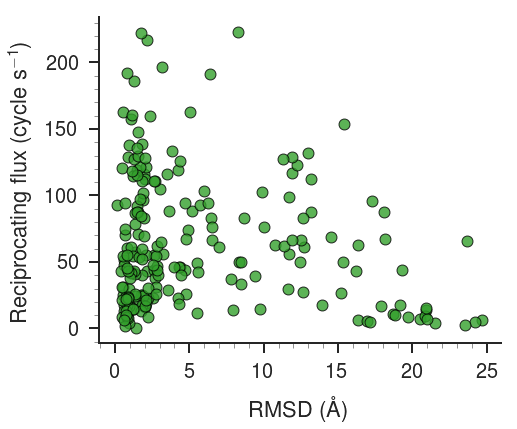

In [48]:
fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1)
ax1 = plt.subplot(grid[0, 0])    
ax1.scatter(rmsds, driven_fluxes, s=120, alpha=0.8, edgecolor='k', lw=1, c=cmap[3])
ax1.set_ylabel('Reciprocating flux (cycle s$^{-1}$)')
ax1.set_xlabel(r'RMSD (\AA)')
paper_plot(fig)

# Spot check
Residue 149 looks like it has a big RMSD based on the structural alignment. Yup, it is listed around 25 Angstroms. 

In [50]:
df[df['ResID'].astype(int) == int(149)]

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
27247,-3.0,-0.000336,4.088999,chi1THR149,1.589180,-0.00001,9.222658e-10,149
27417,-3.0,0.000867,1.228424,chi2THR149,0.562114,0.00000,0.000000e+00,149
27743,-3.0,0.000955,4.772153,phiTHR149,1.102585,0.00002,1.259168e-08,149
27956,-3.0,0.000057,0.579622,psiTHR149,0.207774,0.00003,5.916870e-09,149


And yet the reciprocating fluxes are all small. Ho hum.

The well-behaved dihedral `chi2THR175` has a small RMSD as well.

In [51]:
df[df['ResID'].astype(int) == int(175)]

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
27252,-3.0,1.187340,31.356846,chi1THR175,18.910606,0.02799,1.710749e-02,175
27422,-3.0,-134.848330,159.433257,chi2THR175,33.853339,-0.00010,7.063091e-03,175
27748,-3.0,-0.032792,71.985960,phiTHR175,18.428563,-0.00002,5.973902e-07,175
27961,-3.0,-0.000235,24.348717,psiTHR175,8.596840,-0.00004,4.983805e-09,175


 <img src="adk-thr175-alignment.png">